## Model Selection & Evaluation

<hr>

### Agenda
1. Cross Validation 
2. Hyperparameter Tuning  
3. Model Evaluation 
4. Model Persistance 
5. Validation Curves
6. Learning Curves

<hr>

### 1. Cross Validation
* Simple models underfit.
* Accuracy for training data & validation data is not much different.
* But, accurcy ain't that great.
* This situation is of low variance & high bias
* On moving towards complex models, accuracy improves.
* But, gap between accuracy on training data & validation data increases
* This situation is of high variance & low bias

<img src="https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/image/biasvariance.png" width="400px">

* We need to compare across models to find the best model.
* We need to compare across all hyper-parameters for a particular model.
* The data that is used for training should not be used for validation. 
* The validation accuracy is the one that we claims

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

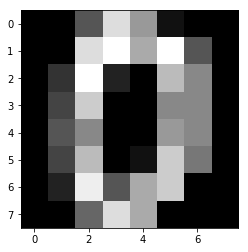

In [7]:
plt.imshow(digits.images[0],cmap='gray')

In [8]:
dt = DecisionTreeClassifier(max_depth=10)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [12]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
dt.score(testX,testY)

0.8488888888888889

In [14]:
dt.score(trainX,trainY)

0.9784706755753526

* Decreasing the complexity of model

In [15]:
dt = DecisionTreeClassifier(max_depth=7)

In [16]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
dt.score(testX,testY)

0.8155555555555556

In [18]:
dt.score(trainX,trainY)

0.8923533778767632

* Observation : With decrease in complexity the gap in training & validation accuracy also decreased

#### Cross Validation API
* Splits data into k parts.
* Use k - 1 parts for training the model
* Use kth part for validation
* Repeat the above steps multiple times to get a genralized behaviour

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(dt, digits.data, digits.target)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [22]:
scores.mean()

0.7424326888371718

#### Cross-validate Function : Scores for multiple matrices

In [29]:
from sklearn.model_selection import cross_validate

In [31]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [32]:
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

C:\Users\awant\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\awant\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.0130055 , 0.01299024, 0.01097131, 0.01200843, 0.01197624]),
 'score_time': array([0.00200057, 0.00199866, 0.00092721, 0.00100017, 0.00099969]),
 'test_accuracy': array([0.75824176, 0.66574586, 0.77437326, 0.767507  , 0.76056338]),
 'test_precision_macro': array([0.76914915, 0.7108411 , 0.77995528, 0.79070953, 0.77760345]),
 'test_recall_macro': array([0.75738524, 0.66585586, 0.77432218, 0.76650794, 0.76228291]),
 'train_accuracy': array([0.90369853, 0.89407666, 0.90125174, 0.92777778, 0.88834951]),
 'train_precision_macro': array([0.90788642, 0.89748337, 0.90470943, 0.931221  , 0.89615475]),
 'train_recall_macro': array([0.90373616, 0.89354486, 0.90111448, 0.92752685, 0.8888177 ])}

#### Stratification for dealing with imbalanced Classes
* StratifiedKFold 
  - Class frequencies are preserved in data splitting

In [33]:
import numpy as np

In [40]:
Y = np.append(np.ones(12),np.zeros(6))

In [41]:
X = np.ones((18,3))

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=3)

In [48]:
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [50]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

### 2. Hyperparameter Tuning
* Model parameters are learnt by learning algorithms based on data
* Hyper-parameters needs to be configured
* Hyper-parameters are data dependent & many times need experiments to find the best
* sklearn provides GridSerach for finding the best hyper-parameters

##### Exhaustive GridSearch
* Searches sequentially for all the configued params
* For all possible combinations

In [51]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [52]:
dt = DecisionTreeClassifier()

In [53]:
from sklearn.model_selection import GridSearchCV

In [74]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5)}, cv=5)

In [75]:
grid_search.fit(digits.data,digits.target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 30, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [76]:
grid_search.best_params_

{'max_depth': 15}

In [77]:
grid_search.best_score_

0.7840845854201447

In [78]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### RandomizedSearch
* Unlike GridSearch, not all parameters are tried & tested
* But rather a fixed number of parameter settings is sampled from the specified distributions.

##### Comparing GridSearch and RandomSearchCV

In [117]:
from time import time

#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [80]:
X = digits.data
Y = digits.target

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [116]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [111]:
param_dist

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, None],
 'max_features': 1,
 'min_samples_split': 3}

In [112]:
rf = RandomForestClassifier(n_estimators=20)

In [118]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 7.48 seconds for 20 candidates parameter settings.


In [119]:
random_search.best_score_

0.9282136894824707

In [124]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 30.00 seconds for 72 candidate parameter settings.


In [125]:
grid_search.best_score_

0.9348914858096828

* GridSearch & RandomizedSearch can fine tune hyper-parameters of transformers as well when part of pipeline

### 3. Model Evaluation
* Three different ways to evaluate quality of model prediction
  - score method of estimators, a default method is configured .i.e r2_score for regression, accuracy for classification
  - Model evalutaion tools like cross_validate or cross_val_score also returns accuracy
  - Metrices module is rich with various prediction error calculation techniques

In [127]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [128]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

* Technique 1 - Using score function

In [129]:
rf.score(testX,testY)

0.9688888888888889

* Technique 2 - Using cross_val_score as discussed above

In [133]:
cross_val_score(rf,X,Y,cv=5)

array([0.91758242, 0.8839779 , 0.95264624, 0.95518207, 0.88732394])

#### Cancer prediction sample for understanding metrices

In [136]:
from sklearn.datasets import load_breast_cancer

In [137]:
dt = DecisionTreeClassifier()

In [138]:
cancer_data = load_breast_cancer()

In [141]:
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [142]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
pred = dt.predict(testX)

#### Technique 3 - Using metrices
##### Classfication metrices
* Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification )

In [134]:
from sklearn import metrics

In [145]:
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.9090909090909091

* Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN
  - True Positive (TP), Actual class is 1 & prediction is also 1
  - True Negative (TN), Actual class is 0 & prediction is also 0
  - False Positive (FP), Acutal class is 0 & prediction is 1
  - False Negative (FN), Actual class is 1 & prediction is 0

In [148]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[43,  2],
       [11, 87]], dtype=int64)

<img src="https://github.com/awantik/machine-learning-slides/blob/master/confusion_matrix.png?raw=true" width="400px">

* Precision Score
  - Ability of a classifier not to label positive if the sample is negative
  - Claculated as TP/(TP+FP)
  - We don't want a non-spam mail to be marked as spam

In [153]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9775280898876404

* Recall Score
  - Ability of classifier to find all positive samples
  - It's ok to predict patient tumor to be cancer so that it undergoes more test
  - But it is not ok to miss a cancer patient without further analysis

In [154]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.8877551020408163

* F1 score
  - Weighted average of precision & recall

In [155]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.9304812834224598

* ROC & AUC 

##### House Price Prediction - Understanding matrices

In [156]:
from sklearn.datasets import california_housing

In [158]:
house_data = california_housing.fetch_california_housing()

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lr = LinearRegression()

In [161]:
lr.fit(house_data.data, house_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [163]:
pred = lr.predict(house_data.data)

#### Matrices for Regression
* mean squared error
  - Sum of squares of difference between expected value & actual value

In [167]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

0.5243209861846071

* mean absolute error
  - Sum of abs of difference between expected value & actual value

In [168]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

0.5311643817546461

* r2 score
  - Returns accuracy of model in the scale of 0 & 1
  - It measures goodness of fit for regression models
  - Calculated as =  (variance explained by the model)/(Total variance)
  - High r2 means target is close to prediction
  
  
  <img src="https://github.com/awantik/machine-learning-slides/blob/master/Capture.PNG?raw=true" width="400px">

In [169]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

0.6062326851998051

### Metrices for Clustering 
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [170]:
from sklearn.metrics.cluster import completeness_score

In [176]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [175]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [177]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [178]:
from sklearn.metrics.cluster import homogeneity_score

In [179]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [180]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [181]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Selecting the number of clusters with silhouette analysis on KMeans clustering

In [193]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

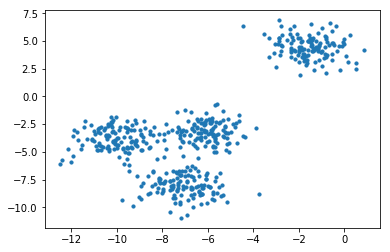

In [194]:
plt.scatter(X[:,0],X[:,1],s=10)

In [195]:
range_n_clusters = [2, 3, 4, 5, 6]

In [196]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [203]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5650860173118194
6 0.4504281968733957


* The best number of clusters is 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [205]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2282.092875614491
6 2043.3289234246856


### 4. Model Persistance
* Model training is an expensive process
* It is desireable to save the model for future reuse
* using pickle & joblib this can be achieved

In [206]:
import pickle

In [207]:
s = pickle.dumps(dt)

In [208]:
pickle.loads(s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [211]:
type(s)

bytes

* joblib is better extension of pickle
* Doesn't convert into string

In [209]:
from sklearn.externals import joblib

In [210]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

* Loading the file back into model

In [212]:
dt = joblib.load('dt.joblib')

In [213]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5. Validation Curves
* To validate a model, we need a scoring function.
* Create a grid of possible hyper-prameter configuration.
* Select the hyper-parameter which gives the best score

In [217]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             digits.data, 
                                             digits.target, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

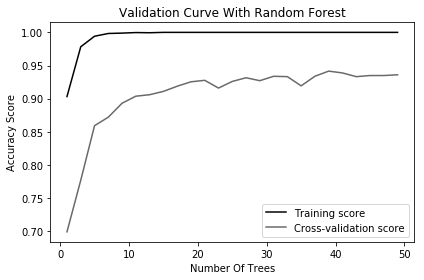

In [220]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### 6. Learning Curves
* Learning curves shows variation in training & validation score on increasing the number of samples

In [221]:
from sklearn.model_selection import learning_curve